In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data

In [2]:
data = pd.read_csv("aggregated_data.csv")

In [3]:
data

,Unnamed: 0.1,level_0,Unnamed: 0,index,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,...,info/learner/default/global_value,info/learner/default/adv,info/learner/default/adv_nei,info/learner/default/adv_global,info/learner/default/adv_diff_mean,info/learner/default/adv_diff_min,info/learner/default/adv_diff_max,info/learner/default/svo_std,info/learner/default/svo_std_param,info/learner/default/environment_used_svo
0,0,39920,39920,0.0,NaN,NaN,NaN,NaN,0.508509,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,39921,39921,1.0,253.306868,149.047879,6.050885,1950.250000,0.000000,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,39922,39922,2.0,424.735838,149.047879,6.168772,1941.125000,2.474474,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,39923,39923,3.0,491.954973,149.047879,6.373184,1921.851115,0.508509,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,39924,39924,4.0,722.952104,149.047879,7.644301,1896.833333,0.000000,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95419,95419,4747,4747,NaN,18988.814660,15148.975070,246.552662,1227.926834,1.321608,4.0,...,139.914977,-0.499109,-0.335222,-0.000153,-0.163887,-17.096002,14.780690,0.098439,-2.318316,0.056505
95420,95420,4748,4748,NaN,18988.814660,15126.898390,245.783288,1228.697487,1.371859,4.0,...,147.867681,-1.371486,-1.267179,-0.001435,-0.104307,-16.636099,22.158212,0.098547,-2.317222,0.063739
95421,95421,4749,4749,NaN,18988.814660,15100.697495,245.248697,1229.621106,1.778894,4.0,...,143.107094,-0.299033,-0.159028,0.000308,-0.140005,-18.198908,17.309744,0.098539,-2.317300,0.048707
95422,95422,4750,4750,NaN,18988.814660,15100.697495,244.859193,1230.092161,2.185930,4.0,...,144.075555,-0.019120,0.023243,0.000476,-0.042363,-19.369255,15.642104,0.098535,-2.317348,0.045680


# Figure 1: Curriculum Learning Figure

In [4]:
data.algo.unique()

array(['IPPO', 'MF-CCPPO', 'Concat-CCPPO', 'CL', 'CL-2M', 'CoPO'],
      dtype=object)

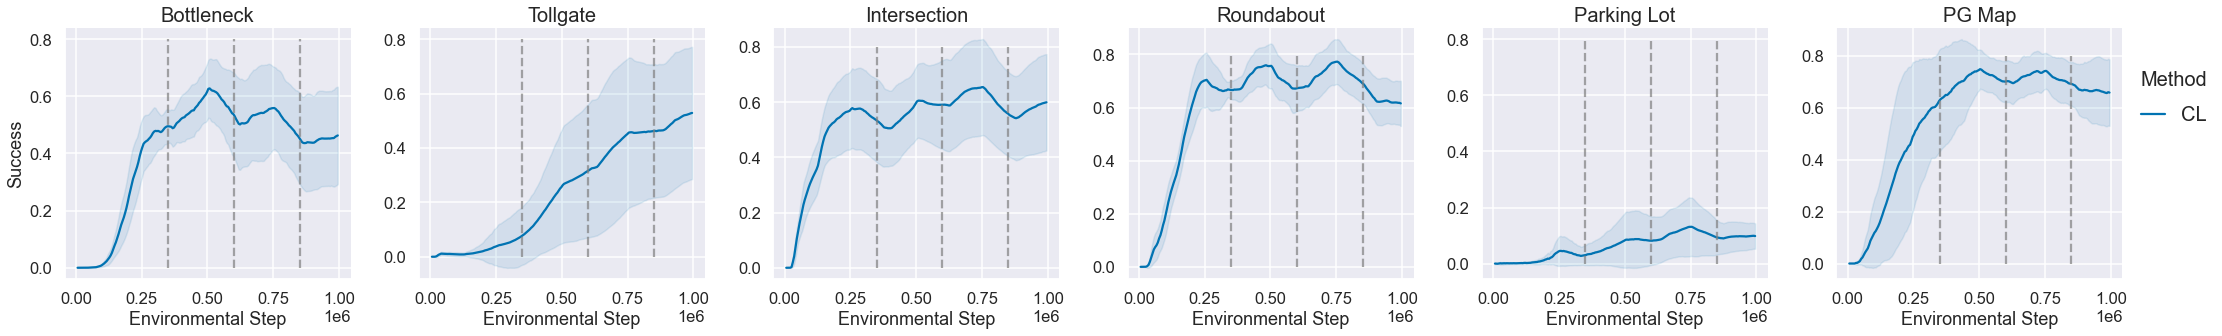

In [5]:
plot_df = data.copy()
x = "timesteps_total"
y = "success"
y_label = 'Success'

tmplist = []
for algo in ["CL"]:
    tmplist.append(plot_df[plot_df.algo == algo])
plot_df = pd.concat(tmplist)

c = sns.color_palette("colorblind")
sns.set("talk", "darkgrid")
ax = sns.relplot(
    x=x,
    y=y, 
    hue='algo',
    palette=list(c)[:len(plot_df.algo.unique())],
    data=plot_df,
    ci="sd",
    kind="line",
    col="env",
    facet_kws=dict(sharey=False, sharex=False),
    err_kws=dict(alpha=0.1),
)

for axxx in ax.axes.flat:
    axxx.set_xlabel("Environmental Step")
ax.set_ylabels(y_label)

fontsize = 20
ax.set_titles(col_template = '{col_name}', size=fontsize)
for env, axxx in ax.axes_dict.items():
    axxx.ticklabel_format(style='sci', scilimits=(0,0), axis='x')    
    axxx.plot([100_0000/4*1 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)
    axxx.plot([100_0000/4*2 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)
    axxx.plot([100_0000/4*3 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)

hs = ax.legend.legendHandles
ax.legend.set_visible(False)
plt.legend(
    handles=hs, 
    title="Method", 
   title_fontsize=fontsize, 
   bbox_to_anchor=(1., 0.9), 
   frameon=False,
   fontsize=fontsize,
   labelspacing=0.8, 
   handlelength=1.2
)

plt.savefig('figs/cl_learning_curve.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.savefig('figs/cl_learning_curve.png', format='png', dpi=200, bbox_inches="tight")

# Figure 2: Learning Curves

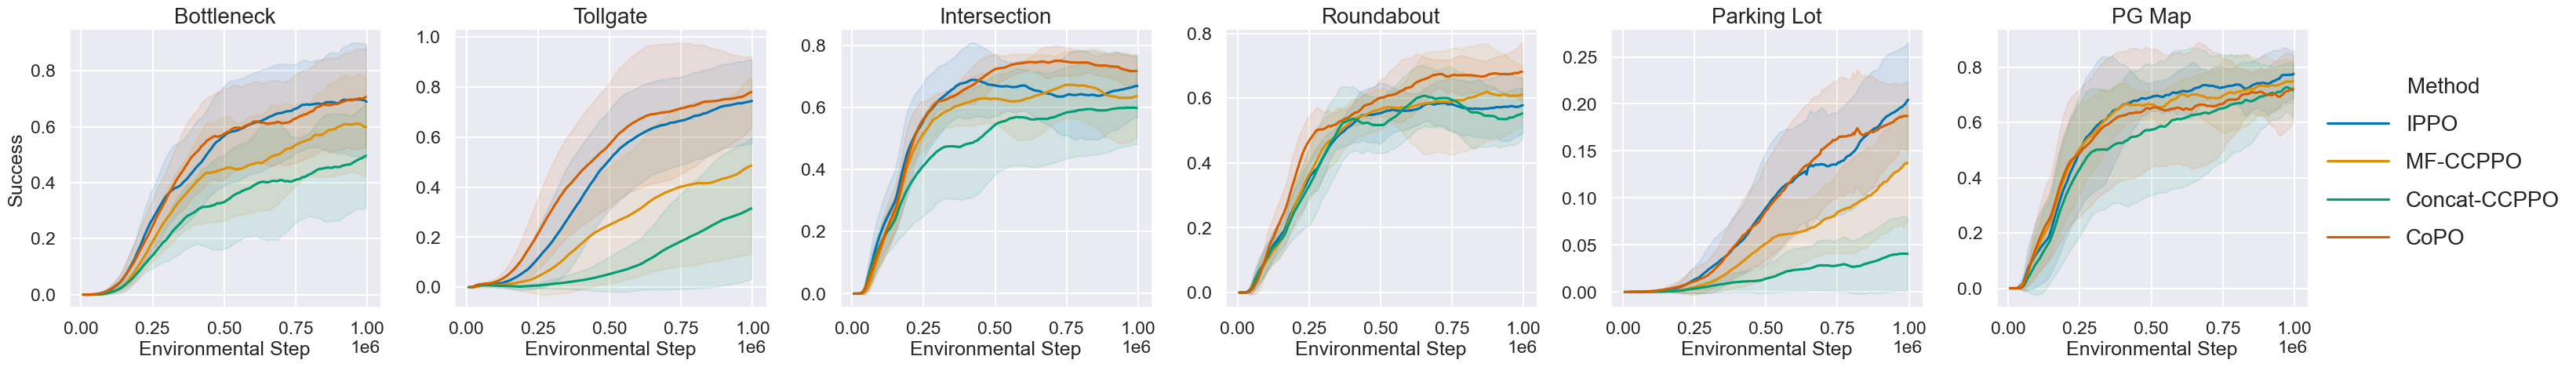

In [6]:
plot_df = data.copy()
x = "timesteps_total"
y = "success"
y_label = 'Success'

tmplist = []
for algo in ['IPPO', 'MF-CCPPO', 'Concat-CCPPO', 'CoPO']:
    tmp = plot_df[plot_df.algo == algo]
    tmp = tmp[tmp.timesteps_total < 100_0000]
    tmplist.append(tmp)
plot_df = pd.concat(tmplist)

c = sns.color_palette("colorblind")
sns.set("talk", "darkgrid")
ax = sns.relplot(
    x=x,
    y=y, 
    hue='algo',
#     palette=[c[0], c[2]],
    palette=list(c)[:len(plot_df.algo.unique())],
    data=plot_df,
    ci="sd",
#     legend=None,
    kind="line",
    col="env",
    facet_kws=dict(sharey=False, sharex=False),
#     linewidth=1,
#     height=5,
#     aspect=1.333,
#     facet_kws={"alpha": 0.1}
#     col_wrap=3,
    err_kws=dict(alpha=0.1),
#     linewidth=2,
#     legend=None
#     legend_out=False
#     facet_kws={"alpha": 0.2}
)

for axxx in ax.axes.flat:
    axxx.set_xlabel("Environmental Step")
ax.set_ylabels(y_label)

fontsize = 20
ax.set_titles(col_template = '{col_name}', size=fontsize)
for env, axxx in ax.axes_dict.items():
    axxx.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

hs = ax.legend.legendHandles
ax.legend.set_visible(False)
plt.legend(
    handles=hs, 
    title="Method", 
    title_fontsize=fontsize, 
    bbox_to_anchor=(1., 0.9), 
    frameon=False,
    fontsize=fontsize,
    labelspacing=0.8, 
    handlelength=2.8
)

plt.savefig('figs/learning_curve.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.savefig('figs/learning_curve.png', format='png', dpi=200, bbox_inches="tight")

# Table: Success rate

In [7]:
[k for k in data.keys() if "suc" in k]

['success',
 'custom_metrics/success_rate_mean',
 'custom_metrics/success_rate_min',
 'custom_metrics/success_rate_max']

In [8]:
pd.DataFrame(columns=plot_df.env.unique())

,Bottleneck,Tollgate,Intersection,Roundabout,Parking Lot,PG Map


In [9]:
plot_df = data.copy()

table_result = pd.DataFrame(columns=plot_df.env.unique())
latex_table_result = pd.DataFrame(columns=plot_df.env.unique())

for algo_name, algo_df in plot_df.groupby("algo"):
    print("\n=== Start processing algorithm: ", algo_name, " ===")
    print("Algo {} has {} trials.".format(algo_name, len(algo_df.file_name.unique())))
    
    if algo_name == "IPPO":  # We train IPPO for 500_0000 steps.
        algo_df = algo_df[algo_df.timesteps_total < 100_0000]
        
    if algo_name == "CL-2M":  # This experiment trains CL for 200_0000 steps (50K steps for one phase).
        continue
    
    for env_name, env_df in algo_df.groupby("env"):
        print("Algo {}, Env {} has {} trials. (Max steps: {})".format(algo_name, env_name, len(env_df.file_name.unique()), round(env_df.timesteps_total.max(), 2)))
        
        algo_env_result = []
        
        for _, trial_df in env_df.groupby("file_name"):
            
            # PZH: At each time step, the success_rate_mean is the average success rate of
            #  recent 100 agent episodes. We take the maximal success_rate_mean across all time steps
            #  as the "success rate" of this trial.
            max_success_rate_mean = trial_df["custom_metrics/success_rate_mean"].max() * 100
            
            algo_env_result.append(max_success_rate_mean)
            
        print("Algo {}, Env {}. Success rate mean: {}, std: {}.".format(algo_name, env_name, np.mean(algo_env_result), np.std(algo_env_result)))
            
        table_result.loc[algo_name, env_name] = "{avg:.2f} ({std:.2f})".format(avg=np.mean(algo_env_result), std=np.std(algo_env_result))
        
#         latex_table_result.loc[algo_name, env_name] = "\shortstack{ %f \\\ \tiny $\pm$ %f }" % (
#             round(np.mean(algo_env_result), 2), round(np.std(algo_env_result), 2)
#         )

        latex_table_result.loc[algo_name, env_name] = "\shortstack{{ {avg:.2f} \\\ \tiny $\pm$ {std:.2f} }}".format(avg=np.mean(algo_env_result), std=np.std(algo_env_result))


=== Start processing algorithm:  CL  ===
Algo CL has 48 trials.
Algo CL, Env Bottleneck has 8 trials. (Max steps: 994982.91)
Algo CL, Env Bottleneck. Success rate mean: 66.4547744137747, std: 10.499511615443224.
Algo CL, Env Intersection has 8 trials. (Max steps: 994982.91)
Algo CL, Env Intersection. Success rate mean: 67.90208521712324, std: 15.003623636477723.
Algo CL, Env PG Map has 8 trials. (Max steps: 994982.91)
Algo CL, Env PG Map. Success rate mean: 77.95830204090574, std: 6.94707848658659.
Algo CL, Env Parking Lot has 8 trials. (Max steps: 994982.91)
Algo CL, Env Parking Lot. Success rate mean: 16.16974052733209, std: 8.936934441230251.
Algo CL, Env Roundabout has 8 trials. (Max steps: 994982.91)
Algo CL, Env Roundabout. Success rate mean: 81.51161377527458, std: 4.488585958722888.
Algo CL, Env Tollgate has 8 trials. (Max steps: 994982.91)
Algo CL, Env Tollgate. Success rate mean: 52.98757680527936, std: 22.861895181281614.

=== Start processing algorithm:  CL-2M  ===
Algo CL

In [10]:
table_result

,Bottleneck,Tollgate,Intersection,Roundabout,Parking Lot,PG Map
CL,66.45 (10.50),52.99 (22.86),67.90 (15.00),81.51 (4.49),16.17 (8.94),77.96 (6.95)
CoPO,73.39 (16.65),79.66 (13.92),77.79 (2.95),73.65 (4.61),20.98 (3.55),80.24 (4.21)
Concat-CCPPO,51.93 (17.03),31.92 (26.01),62.67 (12.46),64.50 (8.46),4.73 (3.83),75.38 (8.69)
IPPO,74.18 (15.87),74.72 (15.82),73.93 (9.18),64.55 (5.17),20.90 (5.70),83.82 (4.40)
MF-CCPPO,65.27 (17.06),48.62 (32.84),71.58 (7.79),68.95 (4.78),14.42 (4.92),79.63 (4.71)


In [11]:
print(table_result.to_markdown())

|              | Bottleneck    | Tollgate      | Intersection   | Roundabout   | Parking Lot   | PG Map       |
|:-------------|:--------------|:--------------|:---------------|:-------------|:--------------|:-------------|
| CL           | 66.45 (10.50) | 52.99 (22.86) | 67.90 (15.00)  | 81.51 (4.49) | 16.17 (8.94)  | 77.96 (6.95) |
| CoPO         | 73.39 (16.65) | 79.66 (13.92) | 77.79 (2.95)   | 73.65 (4.61) | 20.98 (3.55)  | 80.24 (4.21) |
| Concat-CCPPO | 51.93 (17.03) | 31.92 (26.01) | 62.67 (12.46)  | 64.50 (8.46) | 4.73 (3.83)   | 75.38 (8.69) |
| IPPO         | 74.18 (15.87) | 74.72 (15.82) | 73.93 (9.18)   | 64.55 (5.17) | 20.90 (5.70)  | 83.82 (4.40) |
| MF-CCPPO     | 65.27 (17.06) | 48.62 (32.84) | 71.58 (7.79)   | 68.95 (4.78) | 14.42 (4.92)  | 79.63 (4.71) |


In [12]:
print(latex_table_result.to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
{} &                                 Bottleneck &                                   Tollgate &                               Intersection &                                Roundabout &                               Parking Lot &                                    PG Map \\
\midrule
CL           &  \shortstack{ 66.45 \\ \tiny $\pm$ 10.50 } &  \shortstack{ 52.99 \\ \tiny $\pm$ 22.86 } &  \shortstack{ 67.90 \\ \tiny $\pm$ 15.00 } &  \shortstack{ 81.51 \\ \tiny $\pm$ 4.49 } &  \shortstack{ 16.17 \\ \tiny $\pm$ 8.94 } &  \shortstack{ 77.96 \\ \tiny $\pm$ 6.95 } \\
CoPO         &  \shortstack{ 73.39 \\ \tiny $\pm$ 16.65 } &  \shortstack{ 79.66 \\ \tiny $\pm$ 13.92 } &   \shortstack{ 77.79 \\ \tiny $\pm$ 2.95 } &  \shortstack{ 73.65 \\ \tiny $\pm$ 4.61 } &  \shortstack{ 20.98 \\ \tiny $\pm$ 3.55 } &  \shortstack{ 80.24 \\ \tiny $\pm$ 4.21 } \\
Concat-CCPPO &  \shortstack{ 51.93 \\ \tiny $\pm$ 17.03 } &  \shortstack{ 31.92 \\ \tiny $\pm$ 26.01 } &  \shortstack{

/var/folders/vm/zd7wj82n7vs_kxn_n7pnqdw40000gn/T/ipykernel_1471/663464104.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex_table_result.to_latex(escape=False))
